In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

In [118]:
df = pd.read_excel("train.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [119]:
df.shape

(10683, 11)

In [120]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

## DATA PREPROCESSING

In [121]:
df.dropna(inplace=True)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [123]:
#convert duration of hours into minutes
df['Duration'] = df['Duration'].str.replace('h', ':').str.replace('m', '')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2: 50,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7: 25,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19:,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5: 25,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4: 45,1 stop,No info,13302


In [124]:
df['Duration'] = df['Duration'].str.replace(':', '*60').str.replace(' ', '+').apply(eval)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302


In [125]:
df["Journey_day"] = pd.to_datetime(df['Date_of_Journey'], format="%d/%m/%Y").dt.day
df["Journey_month"] = pd.to_datetime(df['Date_of_Journey'], format="%d/%m/%Y").dt.month
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute
df["Arr_hour"] = pd.to_datetime(df["Arrival_Time"]).dt.hour
df["Arr_min"] = pd.to_datetime(df["Arrival_Time"]).dt.minute
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302,1,3,16,50,21,35


In [126]:
df.drop(['Date_of_Journey', 'Dep_Time', 'Arrival_Time'], axis=1, inplace=True)
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,1,3,16,50,21,35


In [127]:
df.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [128]:
g = {'non-stop' : 0, '2 stops' : 2, '1 stop' : 1, '3 stops' : 3, '4 stops' : 4}

In [129]:
df['Total_Stops'] = df['Total_Stops'].map(g)
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,No info,13302,1,3,16,50,21,35


## CORRELATION

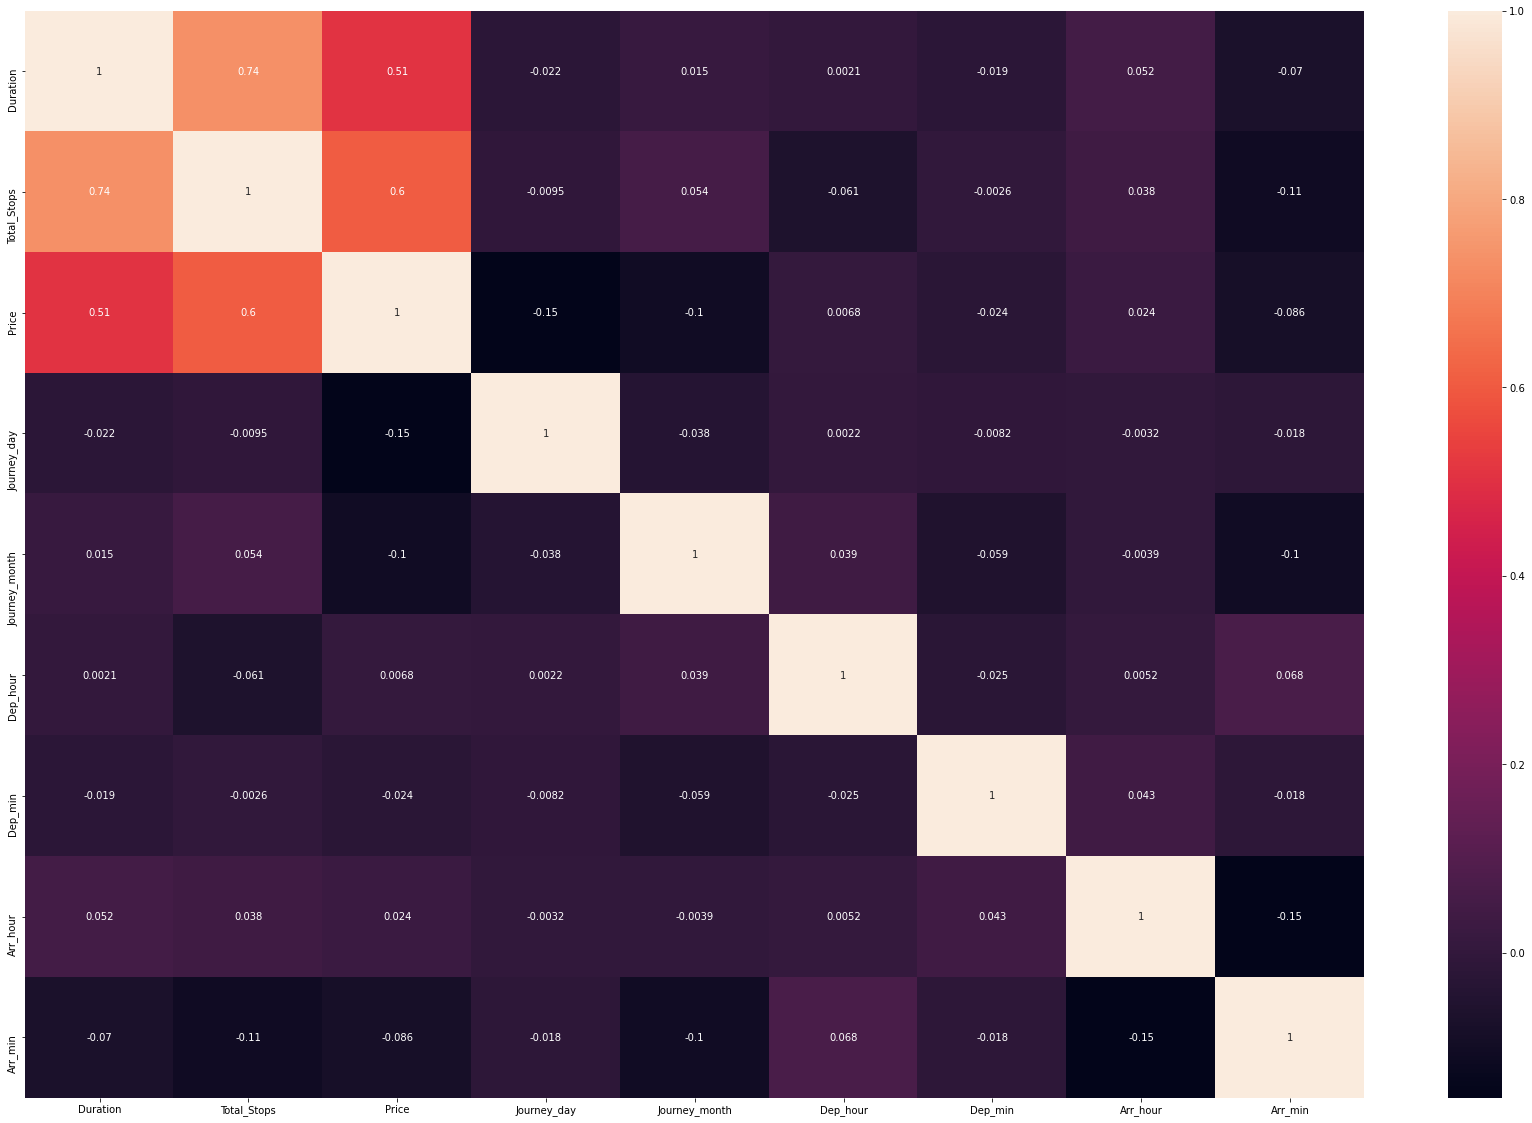

In [130]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), annot=True)

## FEATURE ENGINEERING

## HANDLING CATEGORICAL FEATURES

In [131]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,No info,13302,1,3,16,50,21,35


In [132]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [133]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [134]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [135]:
df['Airline'] = df['Airline'].str.replace('Vistara Premium economy', 'Vistara')
df['Airline'] = df['Airline'].str.replace('Jet Airways Business', 'Jet Airways')
df['Airline'] = df['Airline'].str.replace('Multiple carriers Premium economy', 'Other')
df['Airline'] = df['Airline'].str.replace('Multiple carriers', 'Other')
df['Destination'] = df['Destination'].str.replace('New Delhi', 'Delhi')
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min
0,IndiGo,Banglore,Delhi,BLR → DEL,170,0,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,285,1,No info,13302,1,3,16,50,21,35


In [136]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet', 'Other', 'GoAir',
       'Vistara', 'Air Asia', 'Trujet'], dtype=object)

In [137]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [138]:
df['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [139]:
df['Additional_Info'] = df['Additional_Info'].str.replace('1 Long layover', 'other')
df['Additional_Info'] = df['Additional_Info'].str.replace('Change airports', 'other')
df['Additional_Info'] = df['Additional_Info'].str.replace('Business class', 'other')
df['Additional_Info'] = df['Additional_Info'].str.replace('2 Long layover', 'other')
df['Additional_Info'] = df['Additional_Info'].str.replace('1 Short layover', 'other')
df['Additional_Info'] = df['Additional_Info'].str.replace('Red-eye flight', 'other')
df['Additional_Info'] = df['Additional_Info'].str.replace('No Info', 'No info')

In [140]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min
0,IndiGo,Banglore,Delhi,BLR → DEL,170,0,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,285,1,No info,13302,1,3,16,50,21,35


In [141]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', 'other'], dtype=object)

In [142]:
feat_cat=[feature for feature in df.columns if df[feature].dtype =='O']
df[feat_cat].head(5)

,Airline,Source,Destination,Route,Additional_Info
0,IndiGo,Banglore,Delhi,BLR → DEL,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No info
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,No info


In [143]:
for feature in feat_cat:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is Airline and number of categories are 9
The feature is Source and number of categories are 5
The feature is Destination and number of categories are 5
The feature is Route and number of categories are 128
The feature is Additional_Info and number of categories are 4


In [144]:
for feature in feat_cat:
    labels_ordered=df[feature].value_counts().to_dict()
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df[feature]=df[feature].map(labels_ordered)
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min
0,1,2,2,1,170,0,0,3897,24,3,22,20,1,10
1,2,1,1,73,445,2,0,7662,1,5,5,50,13,15
2,0,0,0,28,1140,2,0,13882,9,6,9,25,4,25
3,1,1,1,62,325,1,0,6218,12,5,18,5,23,30
4,1,2,2,90,285,1,0,13302,1,3,16,50,21,35


In [145]:
df.drop(["Route"], axis = 1, inplace = True)
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min
0,1,2,2,170,0,0,3897,24,3,22,20,1,10
1,2,1,1,445,2,0,7662,1,5,5,50,13,15
2,0,0,0,1140,2,0,13882,9,6,9,25,4,25
3,1,1,1,325,1,0,6218,12,5,18,5,23,30
4,1,2,2,285,1,0,13302,1,3,16,50,21,35


## OUTLIER REMOVAL

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


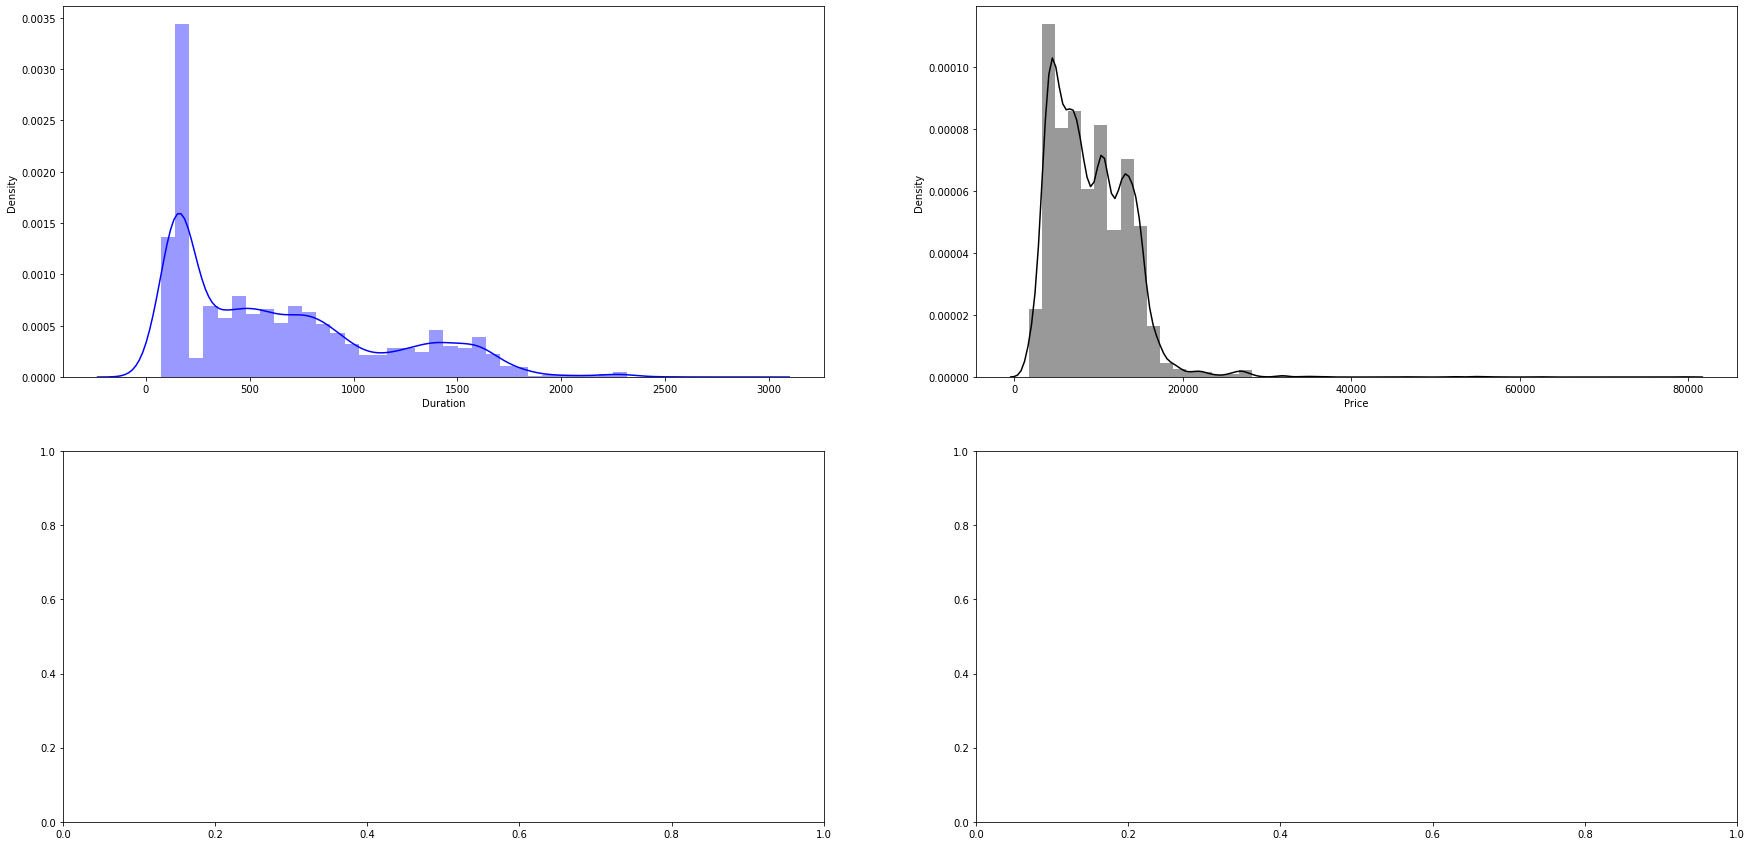

In [146]:
fig, ax = plt.subplots(2,2,figsize = (30,15))
sns.distplot(df["Duration"], kde =True, ax=ax[0,0], color = "blue")
sns.distplot(df["Price"], kde =True, ax=ax[0,1], color = "black")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


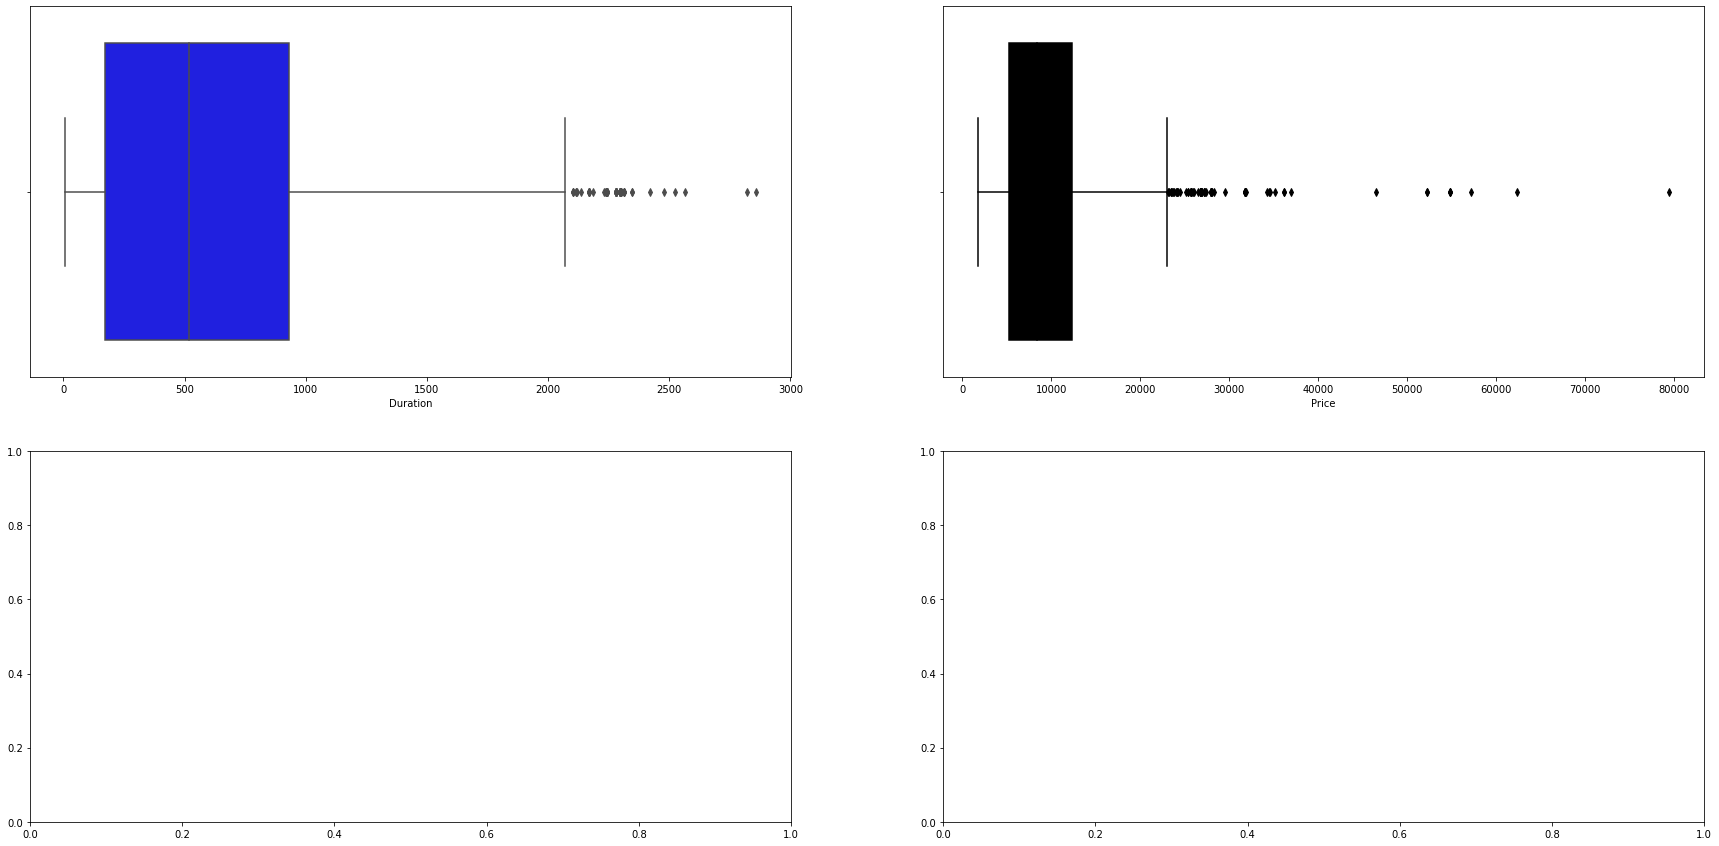

In [147]:
fig, ax = plt.subplots(2,2,figsize = (30,15))
sns.boxplot(df["Duration"], ax=ax[0,0], color = "blue")
sns.boxplot(df["Price"], ax=ax[0,1], color = "black")

In [148]:
df[(df["Duration"]>2100)]

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min
226,0,0,0,2245,2,0,18799,3,3,5,25,18,50
553,2,0,0,2295,2,0,10598,9,3,5,0,19,15
919,2,1,1,2115,3,0,10991,12,5,12,0,23,15
925,0,0,0,2135,2,0,19907,6,3,16,50,4,25
966,2,0,0,2240,2,0,10493,21,5,5,55,19,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9848,2,2,2,2345,2,0,17135,1,3,8,50,23,55
10020,2,0,0,2295,2,0,9653,9,5,5,0,19,15
10326,2,2,2,2420,2,0,11791,3,3,5,50,22,10
10456,0,0,0,2860,2,0,20694,6,3,19,10,18,50


In [149]:
df[(df["Price"]>23000)]

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min
123,2,0,0,1215,1,0,27430,1,3,23,0,19,15
396,3,0,0,385,1,0,36983,1,3,12,50,19,15
486,0,2,2,380,1,0,26890,1,3,8,55,15,15
510,0,2,2,325,1,0,26890,1,3,7,0,12,25
597,2,3,3,1775,2,0,25139,6,3,9,40,15,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,0,3,3,1260,2,0,24210,6,3,19,50,16,50
10364,0,2,2,280,1,3,57209,1,3,9,45,14,25
10383,0,2,2,1325,1,0,26890,1,3,7,0,5,5
10439,0,2,2,860,1,0,31825,1,3,18,40,9,0


In [150]:
df = df.drop(df[(df["Price"]>22000)].index)
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min
0,1,2,2,170,0,0,3897,24,3,22,20,1,10
1,2,1,1,445,2,0,7662,1,5,5,50,13,15
2,0,0,0,1140,2,0,13882,9,6,9,25,4,25
3,1,1,1,325,1,0,6218,12,5,18,5,23,30
4,1,2,2,285,1,0,13302,1,3,16,50,21,35


In [151]:
df = df.drop(df[(df["Duration"] <= 70)].index)
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min
0,1,2,2,170,0,0,3897,24,3,22,20,1,10
1,2,1,1,445,2,0,7662,1,5,5,50,13,15
2,0,0,0,1140,2,0,13882,9,6,9,25,4,25
3,1,1,1,325,1,0,6218,12,5,18,5,23,30
4,1,2,2,285,1,0,13302,1,3,16,50,21,35


In [152]:
df = df.drop(df[(df["Duration"]>2000)].index)
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min
0,1,2,2,170,0,0,3897,24,3,22,20,1,10
1,2,1,1,445,2,0,7662,1,5,5,50,13,15
2,0,0,0,1140,2,0,13882,9,6,9,25,4,25
3,1,1,1,325,1,0,6218,12,5,18,5,23,30
4,1,2,2,285,1,0,13302,1,3,16,50,21,35


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


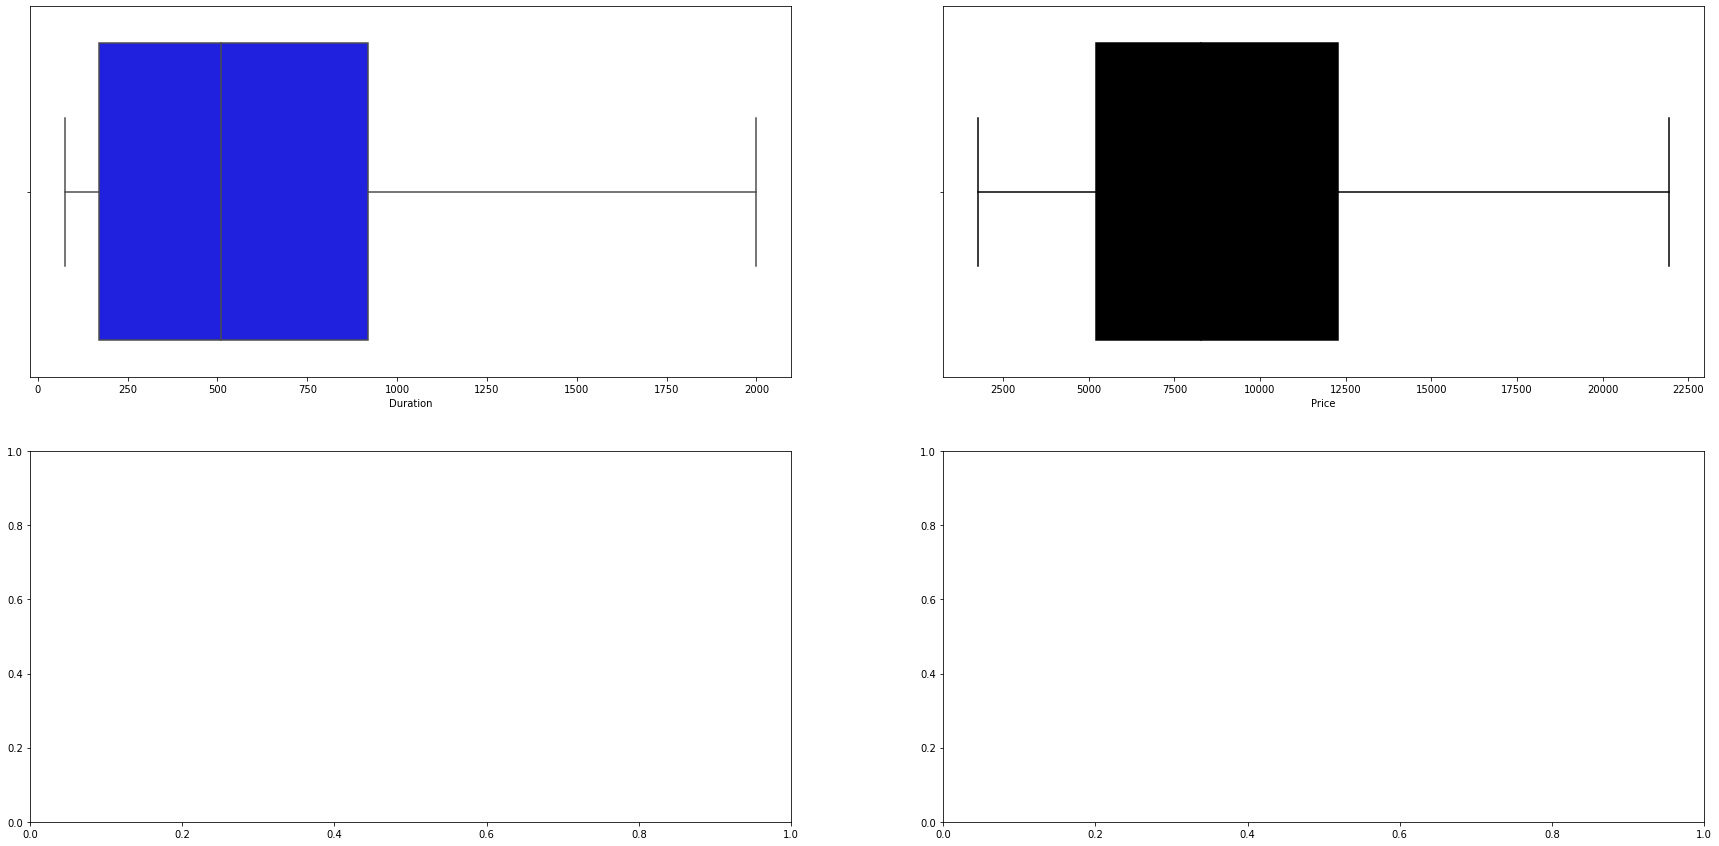

In [153]:
fig, ax = plt.subplots(2,2,figsize = (30,15))
sns.boxplot(df["Duration"], ax=ax[0,0], color = "blue")
sns.boxplot(df["Price"], ax=ax[0,1], color = "black")

In [154]:
df.loc[df['Duration']>1100, 'Duration'] = 1100 
df.loc[df['Price']>16000, 'Price'] = 16000 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


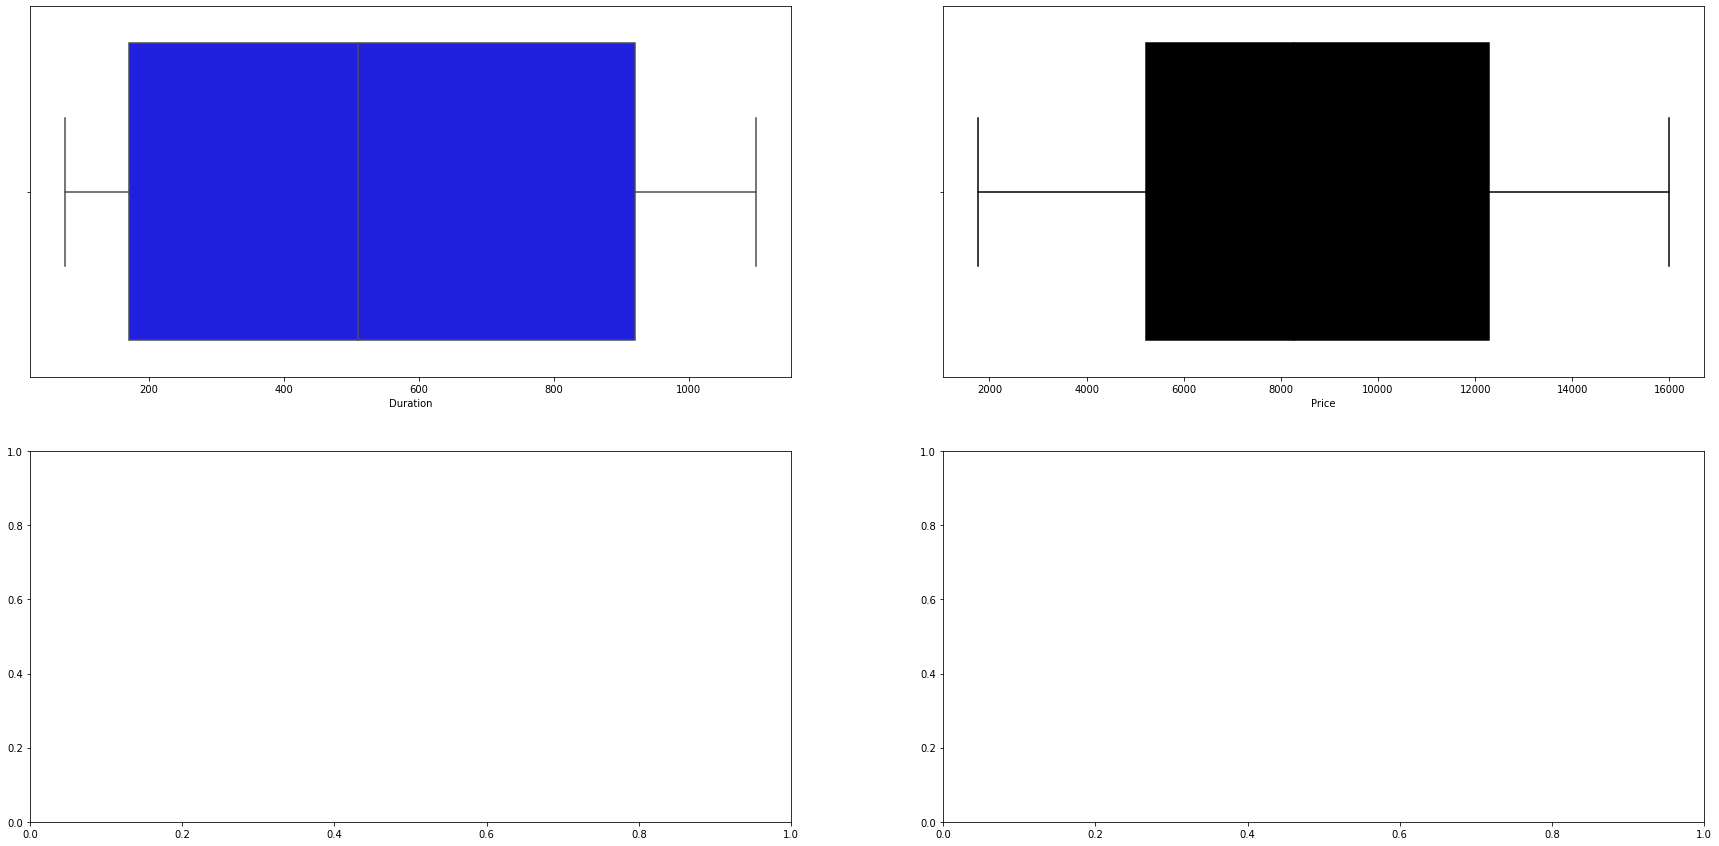

In [155]:
fig, ax = plt.subplots(2,2,figsize = (30,15))
sns.boxplot(df["Duration"], ax=ax[0,0], color = "blue")
sns.boxplot(df["Price"], ax=ax[0,1], color = "black")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


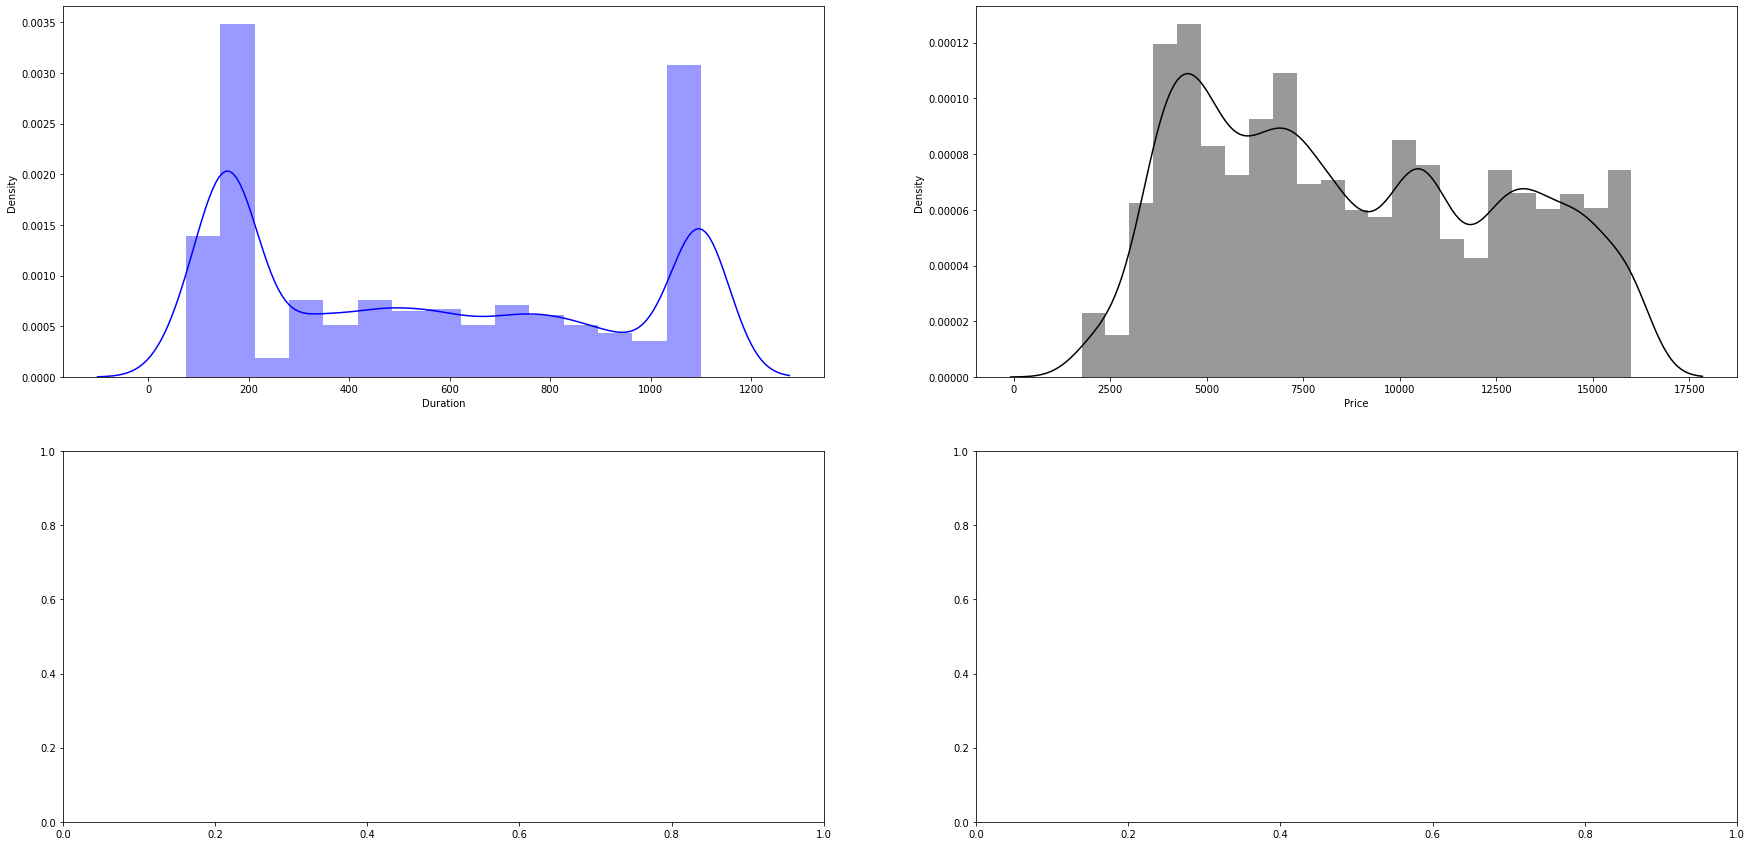

In [156]:
fig, ax = plt.subplots(2,2,figsize = (30,15))
sns.distplot(df["Duration"], kde =True, ax=ax[0,0], color = "blue")
sns.distplot(df["Price"], kde =True, ax=ax[0,1], color = "black")

In [157]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min
0,1,2,2,170,0,0,3897,24,3,22,20,1,10
1,2,1,1,445,2,0,7662,1,5,5,50,13,15
2,0,0,0,1100,2,0,13882,9,6,9,25,4,25
3,1,1,1,325,1,0,6218,12,5,18,5,23,30
4,1,2,2,285,1,0,13302,1,3,16,50,21,35


## TRAIN TEST SPLIT

In [158]:
x=df.drop(['Price'], axis = 1)
y=df['Price']
x.shape, y.shape

((10484, 12), (10484,))

In [159]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size =0.20, random_state = 3)

## RANDOM FOREST REGRESSOR 

In [160]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
clf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [161]:
y_pred = clf.predict(x_test)

In [162]:
clf.score(x_test, y_test)

0.9312523920824882

In [163]:
clf.score(x_train, y_train)

0.9737717433650409

In [164]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 571.6312769566835
MSE: 1048941.5168620648
RMSE: 1024.1784594796284


In [165]:
y_act=clf.predict(x_train)

In [166]:
def rmsle(y_pred,y_test) :
    error = np.square(np.log10(y_pred +1) - np.log10(y_test +1)).mean() ** 0.5
    Acc = 1 - error
    return Acc

print("Accuracy attained on Training Set = ",rmsle(y_act, y_train))
print("Accuracy attained on Test Set = ",rmsle(y_pred,y_test))

Accuracy attained on Training Set =  0.968258263377498
Accuracy attained on Test Set =  0.948539119127124


## HYPERPARAMETER TUNING

In [167]:
from sklearn.model_selection import RandomizedSearchCV

In [168]:
random_grid = {'n_estimators': [100, 200, 300, 500, 700, 900, 1000, 1200, 1300, 1500],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [1, 3, 5, 8, 10, 12, 15, 18, 20, 24],
               'min_samples_split': [2, 4, 5, 6, 8, 10, 12, 15],
               'min_samples_leaf': [1, 2, 5, 10]}

In [169]:
clf_r = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, scoring = 'neg_mean_squared_error', n_iter = 5, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [170]:
clf_r.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] n_estimators=100, min_samples_split=12, min_samples_leaf=5, max_features=auto, max_depth=3 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=100, min_samples_split=12, min_samples_leaf=5, max_features=auto, max_depth=3, total=   0.5s
[CV] n_estimators=100, min_samples_split=12, min_samples_leaf=5, max_features=auto, max_depth=3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=12, min_samples_leaf=5, max_features=auto, max_depth=3, total=   0.5s
[CV] n_estimators=100, min_samples_split=12, min_samples_leaf=5, max_features=auto, max_depth=3 
[CV]  n_estimators=100, min_samples_split=12, min_samples_leaf=5, max_features=auto, max_depth=3, total=   0.5s
[CV] n_estimators=100, min_samples_split=12, min_samples_leaf=5, max_features=auto, max_depth=3 
[CV]  n_estimators=100, min_samples_split=12, min_samples_leaf=5, max_features=auto, max_depth=3, total=   0.5s
[CV] n_estimators=100, min_samples_split=12, min_samples_leaf=5, max_features=auto, max_depth=3 
[CV]  n_estimators=100, min_samples_split=12, min_samples_leaf=5, max_features=auto, max_depth=3, total=   0.5s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=10, max_features=auto, max_depth=20 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=10, max_features=auto, max_depth=20, total=   1.3s
[CV] n_estimators=100, min_samples_split=6, min_sa

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  1.9min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=20,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=2,
                                                   min_samples_split=5,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=1000,
                               

In [171]:
clf_r.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [172]:
clf_r.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 1000}

In [173]:
def predict_val(Airline, Source, Destination, Duration, Total_Stops, Additional_Info, Journey_day, 	Journey_month, 	Dep_hour, 	Dep_min, 	Arr_hour, 	Arr_min):
    data = np.zeros(len(x.columns))
    data[0] = Airline
    data[1] = Source
    data[2] = Destination
    data[3] = Duration
    data[4] = Total_Stops
    data[5] = Additional_Info
    data[6] = Journey_day
    data[7] = Journey_month
    data[8] = Dep_hour
    data[9] = Dep_min
    data[10] = Arr_hour
    data[11] = Arr_min

    
    return clf.predict([data])[0]
    

In [174]:
predict_val(1, 	2, 	3, 	170, 	0, 	0, 24, 	3, 	22, 	20, 	1, 	10 )

5546.494653823955

In [175]:
predict_val(1, 	1, 	1, 	325, 	1, 	0, 	12, 	5, 	18, 	5, 	23, 	30 )

6247.789214069259

In [176]:
predict_val(0, 	0 ,	0, 	1140, 	2, 	0, 9, 	6, 	9, 	25, 	4, 	25 )

13885.09299014249

In [177]:
predict_val(1, 	2, 	2, 	285, 	1, 	0, 1, 	3, 	16, 	50, 	21, 	35 )

10848.426250865801

In [178]:
predict_val(2, 	1, 	1, 	445, 	2, 	0,	1, 	5, 	5, 	50, 	13, 	15)

8009.95662575758